In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Importing the data; Data taken from "historical data" in Yahoo finance.
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
#Store Data
TSLA = pd.read_csv('TSLA.csv')

#Show Data
TSLA = TSLA[:1600]

<function matplotlib.pyplot.show>

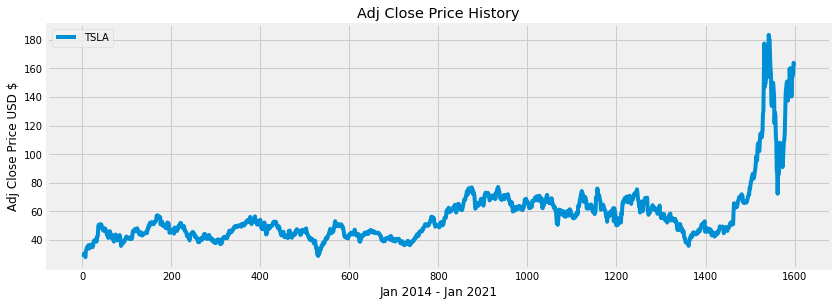

In [4]:
#Visualizing the data
plt.figure(figsize=(12.5, 4.5))
#plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(TSLA['Adj Close'], label='TSLA')
plt.title('Adj Close Price History')
plt.xlabel('Jan 2014 - Jan 2021')
plt.ylabel('Adj Close Price USD $')
plt.legend(loc='upper left')
plt.show

1359.2344058497688 147 312


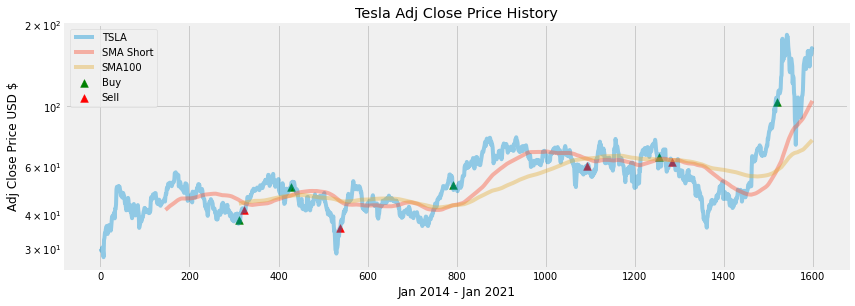

In [9]:
AllBalanceList = [[],[],[]]

def buy_sell(data):
      #Uses the points at which the long term and short term moving average crosses to determine when to sell and when to buy.

      sigPriceBuy = []
      sigPriceSell = []
      flag = -1
      buyList = []
      sellList = []

      for i in range(len(data)):
        if data['SMA_Short'][i] > data['SMA100'][i] and flag != 1:
          sigPriceBuy.append(data['TSLA'][i])
          sigPriceSell.append(np.nan)
          buyList.append(data['TSLA'][i])
          flag = 1
        elif data['SMA_Short'][i] < data['SMA100'][i] and flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['TSLA'][i])
          sellList.append(data['TSLA'][i])
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

      return (sigPriceBuy, sigPriceSell, buyList, sellList)



#For loop for varying the amount of days the moving averages looks at.
for i in range(5, 50):
  shortRunDays = 3*i
  for j in range(1, 40):
    #Creating a moving average

    SMA_Short = pd.DataFrame()
    SMA_Short['Adj Close'] = TSLA['Adj Close'].rolling(window=shortRunDays).mean()

    longRunDays = 8*j
    SMA100 = pd.DataFrame()
    SMA100['Adj Close'] = TSLA['Adj Close'].rolling(window=longRunDays).mean()


    #New Data for buying and selling
    Data = pd.DataFrame()

    Data['TSLA'] = TSLA['Adj Close']
    Data['SMA_Short'] = TSLA['Adj Close'].rolling(window=shortRunDays).mean()
    Data['SMA100'] = TSLA['Adj Close'].rolling(window=longRunDays).mean()


    #Function for when to buy and sell


    

    Buy_Sell = buy_sell(Data)


    Data['buy_Signal_Price'] = Buy_Sell[0]
    Data['sell_Signal_Price'] = Buy_Sell[1]

    buyList = Buy_Sell[2]
    sellList = Buy_Sell[3]


    #Visualizing the data
    if i == 150 and j == 1:
        plt.figure(figsize=(12.5, 4.5))
        plt.yscale('log')

        plt.plot(Data['TSLA'], label='TSLA', alpha=0.4)
        plt.plot(Data['SMA_Short'], label='SMA Short', alpha=0.4)
        plt.plot(Data['SMA100'], label='SMA100', alpha=0.4)
        plt.scatter(Data.index ,Data['buy_Signal_Price'],label='Buy' , marker='^', color='green', s=60)
        plt.scatter(Data.index ,Data['sell_Signal_Price'],label='Sell' , marker='^', color='red', s=60)
        plt.title('Tesla Adj Close Price History')
        plt.xlabel('Jan 2014 - Jan 2021')
        plt.ylabel('Adj Close Price USD $')
        plt.legend(loc='upper left')
        plt.show


    

    #Checking how trading algorithm would work

    Stocks = 0
    Balance = 1000


    sellList.append(Data['TSLA'][1599])

    for i in range(len(buyList)):
      Stocks = Balance/buyList[i]
      Balance = Stocks*sellList[i]

    AllBalanceList[0].append(Balance)
    AllBalanceList[1].append(shortRunDays)
    AllBalanceList[2].append(longRunDays)


#Visualizing the data
plt.figure(figsize=(12.5, 4.5))
plt.yscale('log')

plt.plot(Data['TSLA'], label='TSLA', alpha=0.4)
plt.plot(Data['SMA_Short'], label='SMA Short', alpha=0.4)
plt.plot(Data['SMA100'], label='SMA100', alpha=0.4)
plt.scatter(Data.index ,Data['buy_Signal_Price'],label='Buy' , marker='^', color='green', s=60)
plt.scatter(Data.index ,Data['sell_Signal_Price'],label='Sell' , marker='^', color='red', s=60)
plt.title('Tesla Adj Close Price History')
plt.xlabel('Jan 2014 - Jan 2021')
plt.ylabel('Adj Close Price USD $')
plt.legend(loc='upper left')
plt.show
#plt.plot(balanceList)

print(Balance, shortRunDays, longRunDays)


4901.268594031735


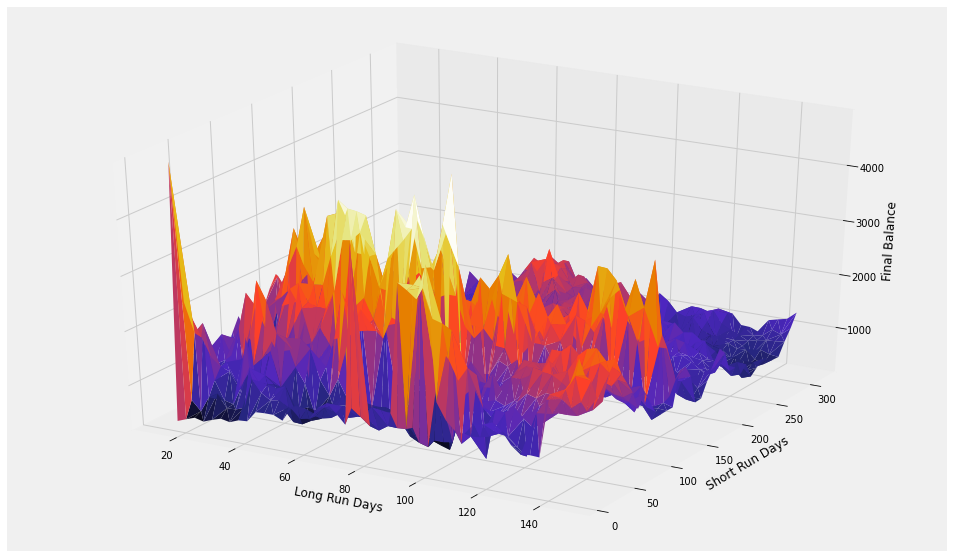

In [10]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(AllBalanceList[1], AllBalanceList[2], AllBalanceList[0], marker='o')
print(max(AllBalanceList[0]))

ax.plot_trisurf(np.array(AllBalanceList[1]), np.array(AllBalanceList[2]), np.array(AllBalanceList[0]), cmap='CMRmap')

ax.set_xlabel('Long Run Days')
ax.set_ylabel('Short Run Days')
ax.set_zlabel('Final Balance')

plt.show()